# Pandas: 
### - Concatenating and Joining DataFrames
### - Visualising data in DataFrames

<strong> <h2> Run The Following Code </h2> </strong>

Hit SHIFT + ENTER when your cusor is inside the cell of code.<br/>

> Data Preparation. Importing pandas

In [1]:
import pandas as pd

In [2]:
# Import the two plotting packages (don't have to use both)
## Package: Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Package: Seaborn
import seaborn as sns

In [3]:
# These two lines are to set the size of the plot/chart
## For Matplotlib
plt.rc('figure', figsize=(16,9))
## For Seaborn
sns.set(rc= {"figure.figsize": (16, 9)})

> Open up a CSV file

In [5]:
hdb = 'data/0_raw_data/sample/years/hdb_resale_sample_raw_2012.csv'

df = pd.read_csv(hdb)

> viewing the contents of the dataset

The main dataset that we will work on is on HDB resale data.<br/>
See the description below for the fields given. <br/>
<br/>
<table>
    <tr><th>Field</th><th>Description</th></tr>
    <tr><td>Trans_YearMonth</td><td>year-month (YYYY-MM) for transaction</td></tr>
    <tr><td>town</td><td>town for the resale flat</td></tr>
    <tr><td>flat_type</td><td>flat type for the resale flat</td></tr>
    <tr><td>block</td><td>block for the resale flat</td></tr>
    <tr><td>street_name</td><td>street for the resale flat</td></tr>
    <tr><td>storey_range</td><td>storey range for the resale flat</td></tr>
    <tr><td>floor_area_sqm</td><td>floor area in square meter</td></tr>
    <tr><td>flat_model</td><td>model of resale flat</td></tr>
    <tr><td>lease_commence_date</td><td>year of lease commencement</td></tr>
    <tr><td>resale_price</td><td>price of the resale flat</td></tr>
</table>

In [6]:
df.shape #num of rows and columns 15000 rows, 10 columns

(1950, 9)

In [7]:
df.head() #first 5 rows of data

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,3 ROOM,21,BALAM RD,01 TO 05,60.0,Standard,1967,276500
1,2012-03,3 ROOM,19,BALAM RD,06 TO 10,60.3,Standard,1967,285000
2,2012-03,3 ROOM,23,BALAM RD,01 TO 05,60.3,Standard,1967,290000
3,2012-03,3 ROOM,19,BALAM RD,01 TO 05,60.3,Standard,1967,295000
4,2012-03,3 ROOM,20,BALAM RD,01 TO 05,60.3,Standard,1967,299000


## Concatenating DataFrames (with .concat)

> Concatenating DataFrames

In [8]:
import os

In [9]:
os.listdir() #prints out current working directory

['.DS_Store',
 'DC_Bootcamp_Week_8_Solutions.ipynb',
 'DC_Bootcamp_Week_8_Questions.ipynb',
 '.ipynb_checkpoints',
 'data']

In [10]:
os.listdir('data/0_raw_data/sample/years') #prints out files in specific path

['hdb_resale_sample_raw_2017.csv',
 'hdb_resale_sample_raw_2016.csv',
 'hdb_resale_sample_raw_2014.csv',
 'hdb_resale_sample_raw_2015.csv',
 'hdb_resale_sample_raw_2012.csv',
 'hdb_resale_sample_raw_2013.csv',
 'hdb_resale_sample_raw_2021.csv',
 'hdb_resale_sample_raw_2020.csv',
 'hdb_resale_sample_raw_2018.csv',
 'hdb_resale_sample_raw_2019.csv']

In [11]:

folder_path = 'data/0_raw_data/sample/years'

dfs_list = []
for filename in os.listdir(folder_path): #loop through the files and save dataframes
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_list.append(df_temp)
    print("appended " + filename + " with " + str(len(df_temp)) + " rows to the list of DataFrames")

appended hdb_resale_sample_raw_2017.csv with 1641 rows to the list of DataFrames
appended hdb_resale_sample_raw_2016.csv with 1523 rows to the list of DataFrames
appended hdb_resale_sample_raw_2014.csv with 1320 rows to the list of DataFrames
appended hdb_resale_sample_raw_2015.csv with 1562 rows to the list of DataFrames
appended hdb_resale_sample_raw_2012.csv with 1950 rows to the list of DataFrames
appended hdb_resale_sample_raw_2013.csv with 1491 rows to the list of DataFrames
appended hdb_resale_sample_raw_2021.csv with 618 rows to the list of DataFrames
appended hdb_resale_sample_raw_2020.csv with 1610 rows to the list of DataFrames
appended hdb_resale_sample_raw_2018.csv with 1631 rows to the list of DataFrames
appended hdb_resale_sample_raw_2019.csv with 1654 rows to the list of DataFrames


In [12]:
#concatenate dataframes
df = pd.concat(dfs_list)
#notice the index is off because it follows respective dataframes index
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01,3 ROOM,37,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,250000.0
1,2017-01,3 ROOM,21,BALAM RD,01 TO 03,60.0,Standard,1967,230000.0
2,2017-01,3 ROOM,22,BALAM RD,04 TO 06,60.0,Standard,1967,235000.0
3,2017-01,3 ROOM,24,BALAM RD,01 TO 03,60.0,Standard,1967,262000.0
4,2017-01,3 ROOM,65,CIRCUIT RD,01 TO 03,59.0,Standard,1967,263000.0
...,...,...,...,...,...,...,...,...,...
1649,2019-12,3 ROOM,235,LOR 8 TOA PAYOH,04 TO 06,65.0,Improved,1976,235000.0
1650,2019-12,4 ROOM,226,LOR 8 TOA PAYOH,13 TO 15,82.0,Improved,1976,318000.0
1651,2019-12,5 ROOM,223,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,508880.0
1652,2019-12,4 ROOM,8,MARSILING DR,04 TO 06,88.0,Improved,1976,255000.0


In [13]:
#concatenate dataframes
df = pd.concat(dfs_list, ignore_index=True) #concatenate dataframes
#notice the index is now correct
df

,Tranc_YearMonth,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01,3 ROOM,37,TEBAN GDNS RD,04 TO 06,67.0,Improved,1966,250000.0
1,2017-01,3 ROOM,21,BALAM RD,01 TO 03,60.0,Standard,1967,230000.0
2,2017-01,3 ROOM,22,BALAM RD,04 TO 06,60.0,Standard,1967,235000.0
3,2017-01,3 ROOM,24,BALAM RD,01 TO 03,60.0,Standard,1967,262000.0
4,2017-01,3 ROOM,65,CIRCUIT RD,01 TO 03,59.0,Standard,1967,263000.0
...,...,...,...,...,...,...,...,...,...
14995,2019-12,3 ROOM,235,LOR 8 TOA PAYOH,04 TO 06,65.0,Improved,1976,235000.0
14996,2019-12,4 ROOM,226,LOR 8 TOA PAYOH,13 TO 15,82.0,Improved,1976,318000.0
14997,2019-12,5 ROOM,223,LOR 8 TOA PAYOH,10 TO 12,117.0,Standard,1976,508880.0
14998,2019-12,4 ROOM,8,MARSILING DR,04 TO 06,88.0,Improved,1976,255000.0


## Joining DataFrames (with .merge)

> Joining DataFrames (with an simple example)

In [14]:
df1 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Mutu"], "class": ["a", "b", "b"]})
df1

,Name,class
0,Ali,a
1,Ah Ming,b
2,Mutu,b


In [15]:
df2 = pd.DataFrame({"Name": ["Ali", "Ah Ming", "Ah Ming", "Siti"], "subject": ["eng", "eng", "math", "math"], "score": [85, 25, 76, 80]})
df2

,Name,subject,score
0,Ali,eng,85
1,Ah Ming,eng,25
2,Ah Ming,math,76
3,Siti,math,80


In [16]:
# You can experimenting with the "left", "right", "inner", "outer" on the 'how' parameter to see the impacts
df1.merge(df2, how='left', on='Name')

,Name,class,subject,score
0,Ali,a,eng,85.0
1,Ah Ming,b,eng,25.0
2,Ah Ming,b,math,76.0
3,Mutu,b,NaN,NaN


> Joining DataFrames (using HDB dataset)

In [17]:
df_mapping_streetname_to_town = pd.read_csv('data/0_raw_data/sample/hdb_resale_sample_raw_towns.csv') #towns dataframe

In [18]:
df_mapping_streetname_to_town.head()

,town,street_name
0,JURONG EAST,TEBAN GDNS RD
1,GEYLANG,BALAM RD
2,QUEENSTOWN,C'WEALTH CL
3,QUEENSTOWN,C'WEALTH DR
4,TOA PAYOH,LOR 1 TOA PAYOH


In [19]:
df_dataset = pd.merge(df, df_mapping_streetname_to_town, how='left', on='street_name') #joined dataframe

In [20]:
# To delete a variable (and erase the memory)
del df_dataset

<br/>

---

---

# Visualising Data in DataFrames

In [21]:
# Ignore the " DtypeWarning" warning
df = pd.read_csv('data/1_processed_data/hdb_resale_sample_processed.csv')

---

## Charts that doesn't need groupby
- These charts can use raw data, without aggregating the data first
- These are charts that shows entire distribution of the data.

### Histogram
Good to show distribution of data

<AxesSubplot:ylabel='Frequency'>

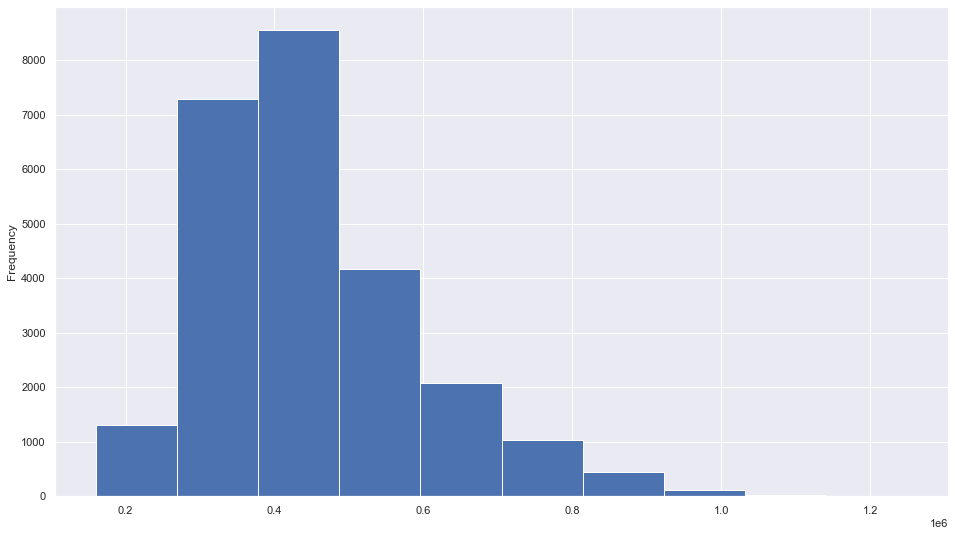

In [22]:
df['resale_price'].plot.hist()

## Scatterplot
Good to show relationships between 2 numerical fields

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

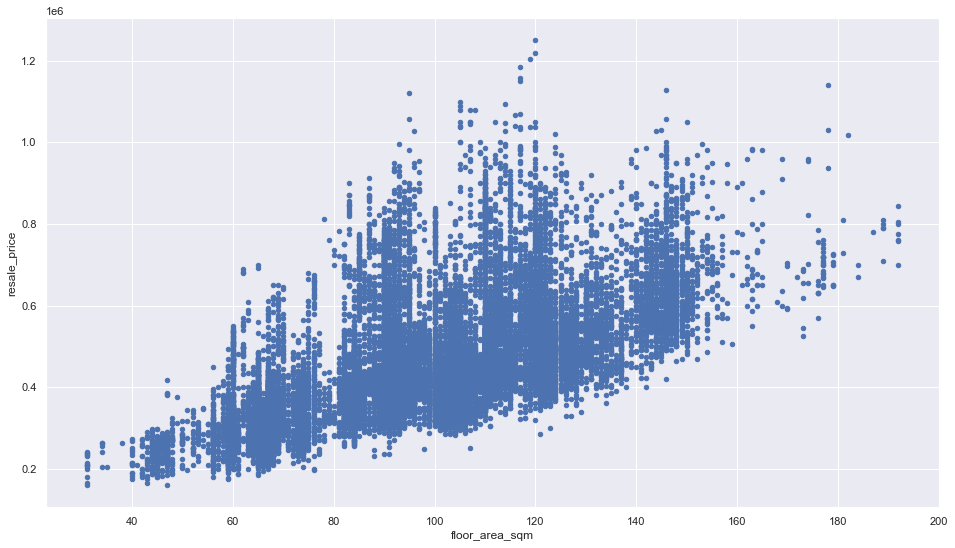

In [23]:
df.plot.scatter('floor_area_sqm', 'resale_price')

## Boxplot
Good to describe numerical fields

![Boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

<AxesSubplot:>

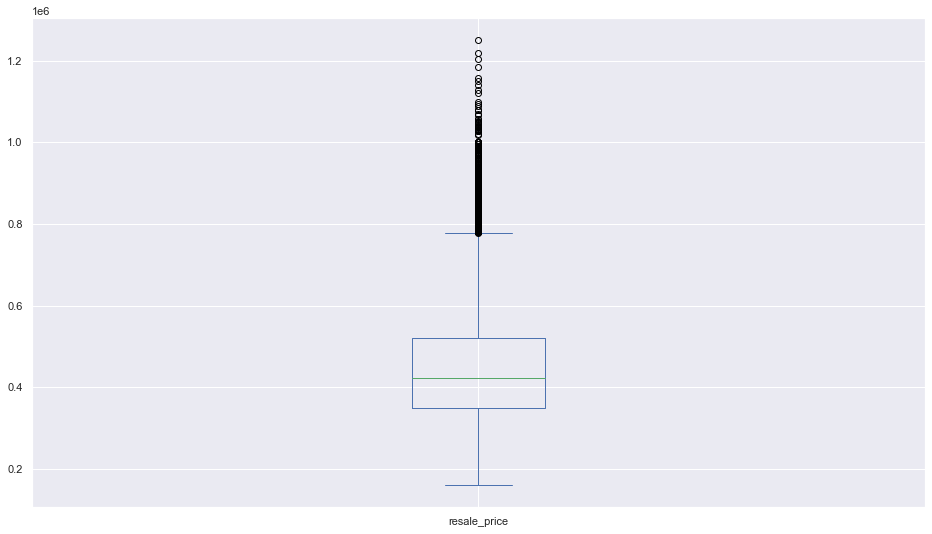

In [24]:
# The number of y-axis is the scientific notation of numbers (just like our scientific calculator)
df['resale_price'].plot.box()

---

# Charts that need groupby
These are charts that require some groupby aggregation 

### Line Chart
Good to show time trends

<AxesSubplot:xlabel='lease_commence_date'>

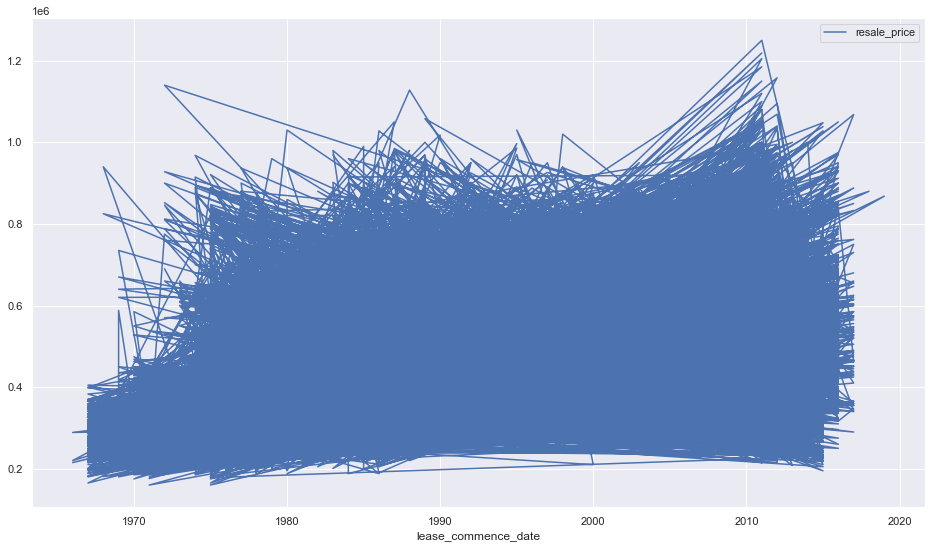

In [25]:
df.plot.line(x='lease_commence_date', y='resale_price')

<AxesSubplot:xlabel='lease_commence_date'>

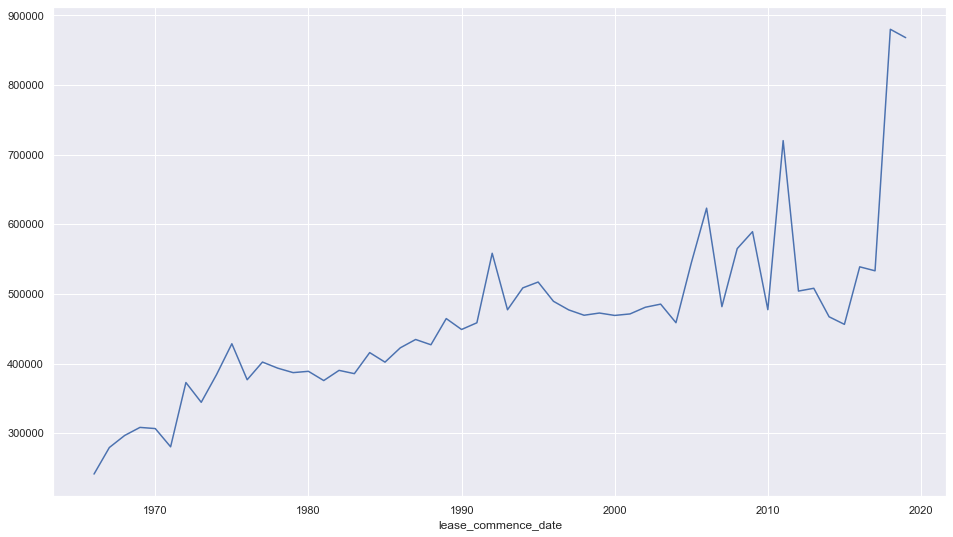

In [26]:
byyear = df.groupby('lease_commence_date')
pricebyyear = byyear['resale_price'].mean()
pricebyyear.plot.line(x='lease_commence_date', y='resale_price')

> Multiple lines

Need to create a table as below.
   <table>
    <tr><th></th><th>line1</th><th>line2</th><th>line3</th></tr>
    <tr><td><b>year1</b></td><td>line1_year1_values</td><td>line2_year1_values</td><td>line3_year1_values</td></tr>
    <tr><td><b>year2</b></td><td>line1_year2_values</td><td>line2_year2_values</td><td>line3_year2_values</td></tr>
    <tr><td><b>year3</b></td><td>line1_year3_values</td><td>line2_year3_values</td><td>line3_year3_values</td></tr>
   </table>
   
We can use the pivot function to help us.

<AxesSubplot:xlabel='lease_commence_date'>

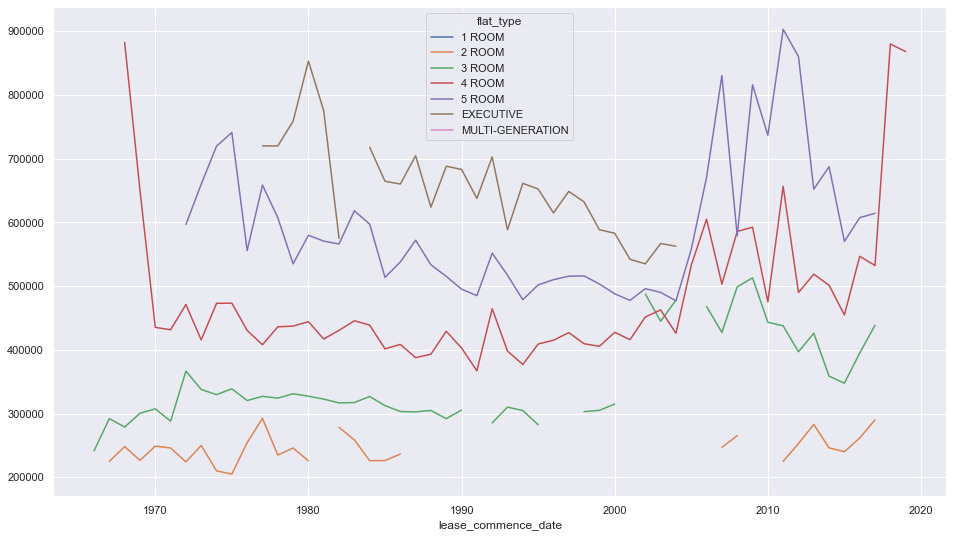

In [27]:
df.pivot_table('resale_price', 'lease_commence_date', 'flat_type', 'mean').plot.line()

<AxesSubplot:xlabel='lease_commence_date'>

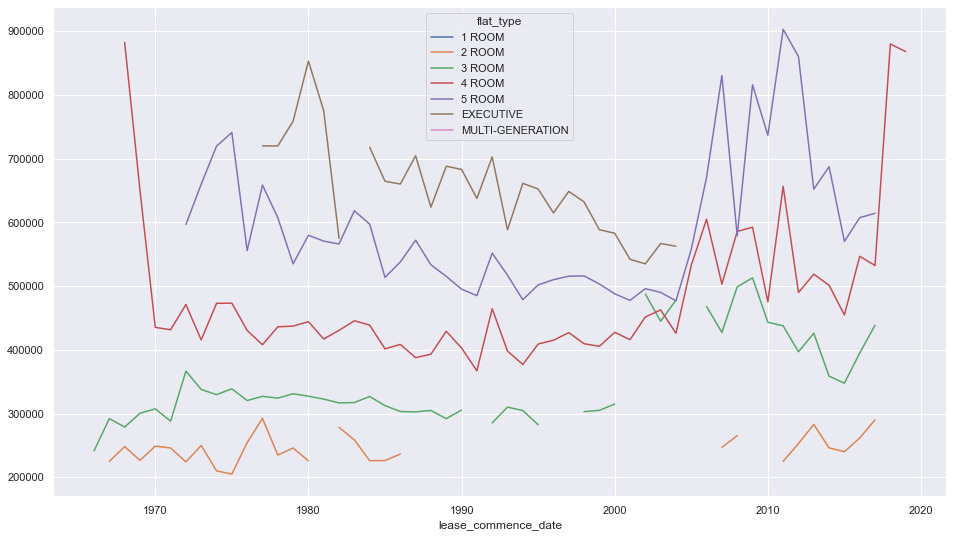

In [28]:
byyearft = df.groupby(['lease_commence_date','flat_type'], as_index=False)
pricebyyearft = byyearft['resale_price'].mean()
pivot = pricebyyearft.pivot(index='lease_commence_date', columns='flat_type', values='resale_price')
pivot.plot.line()

## Bar
Good to compare between categories

In [29]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

<AxesSubplot:xlabel='flat_type'>

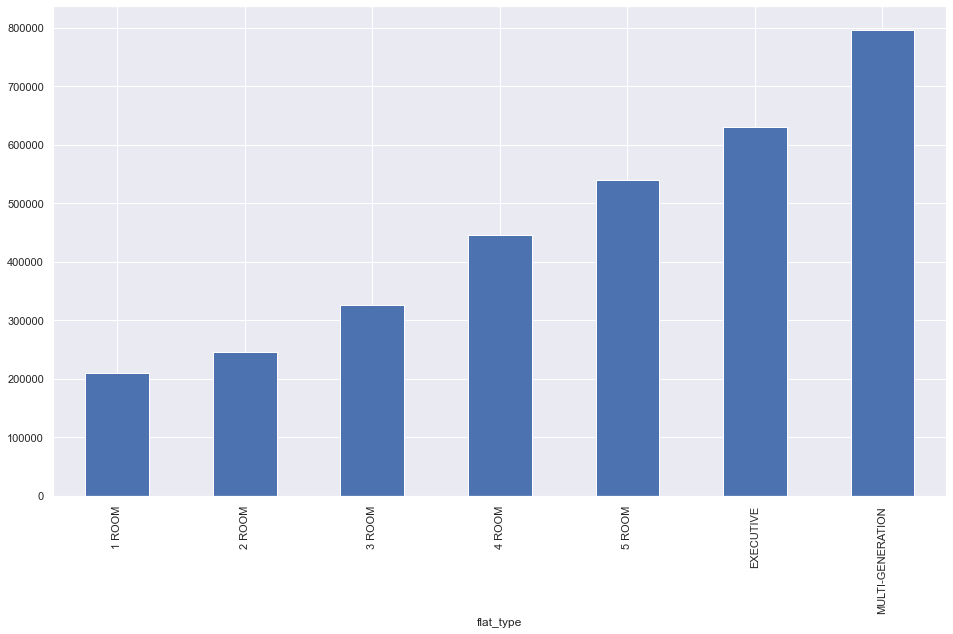

In [30]:
byflattype = df.groupby('flat_type')
pricebyflattype = byflattype[['resale_price','price_per_sqm']].mean()
pricebyflattype['resale_price'].plot.bar()

<AxesSubplot:xlabel='flat_type'>

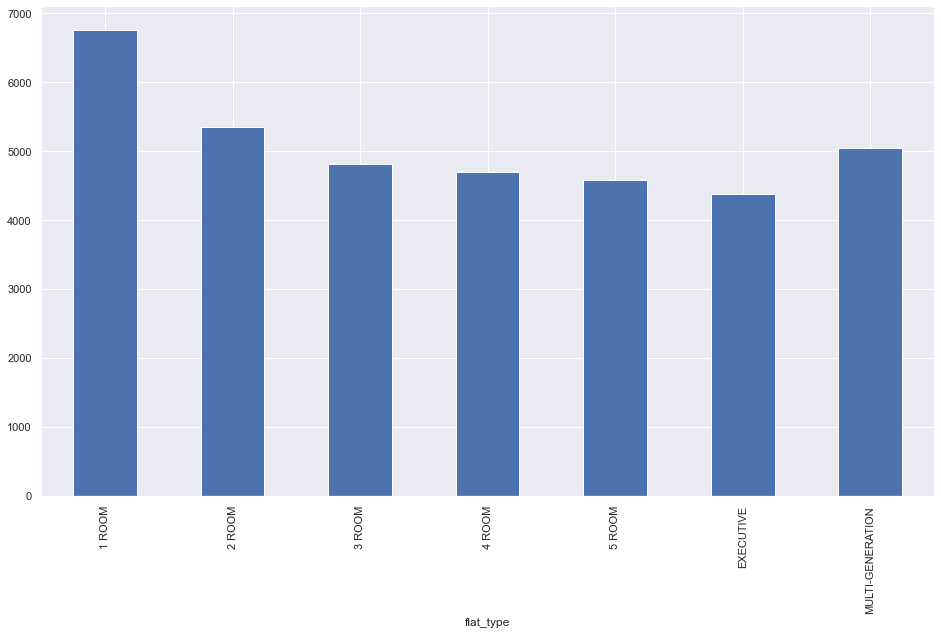

In [31]:
pricebyflattype['price_per_sqm'].plot.bar()

> multiple axis

## Seaborn for Data Exploration 

- You can see seaborn is much intuitive and easier to use
- we don't have to aggregate the numbers before passing to the seaborn 
- It allows us to generate comprehensive charts that can be used to understand the data, with very little codes

<AxesSubplot:xlabel='flat_type', ylabel='price_per_sqm'>

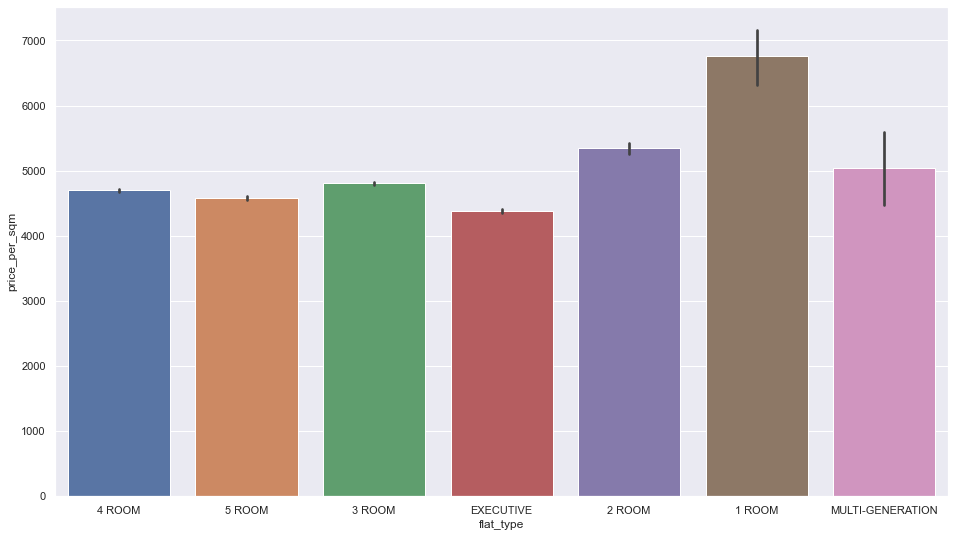

In [32]:
# Notice that no aggregation is required
sns.barplot(x='flat_type', y='price_per_sqm', data=df)

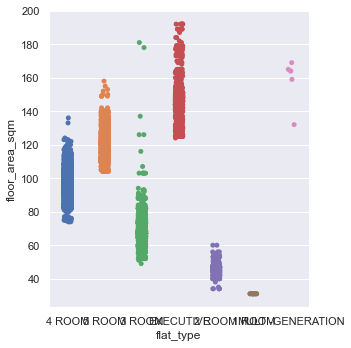

In [33]:
# Seaborn also offers charts that can efficiently visualise the individual data points
# To help us better understanding the data and potentially observe odds data points
sns.catplot(x='flat_type', y='floor_area_sqm', data=df)

<AxesSubplot:xlabel='floor_area_sqm', ylabel='price_per_sqm'>

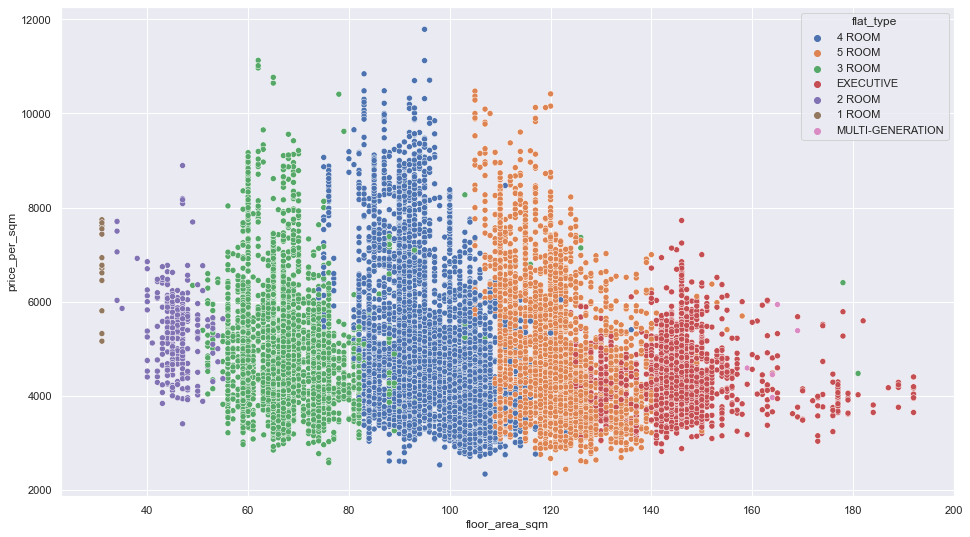

In [34]:
# Seaborn's scatterplot can be useful for exploring multi-dimensional data


sns.scatterplot(x='floor_area_sqm', y='price_per_sqm', hue='flat_type', data=df)

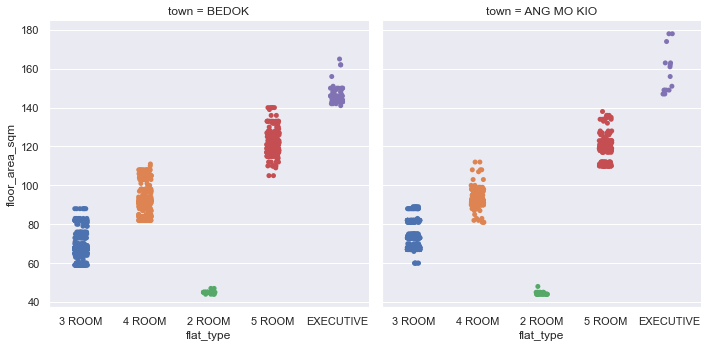

In [35]:
# Create a subset of dataset for visualisation
df_subset = df[(df['town'] == 'ANG MO KIO') | (df['town'] == 'BEDOK')]

# Seaborn can be used to quickly explore the characteristics of data
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town',
            data=df_subset)

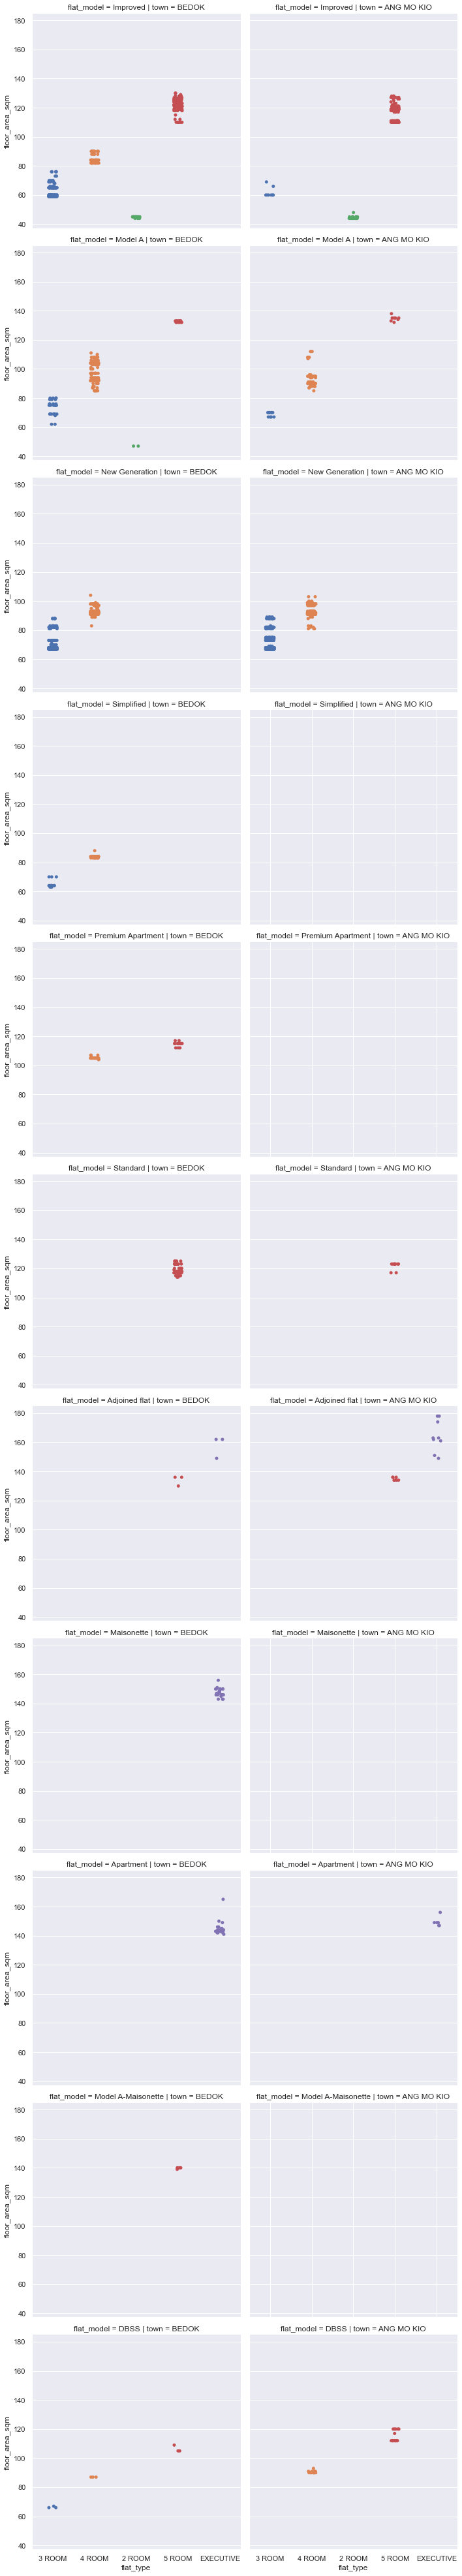

In [36]:
# You can also define another 'dimension' for the col (column) 
# This will take a bit of time to generate
sns.catplot(x='flat_type', y='floor_area_sqm',
            col='town', row='flat_model',
            data=df_subset)

# !! Your Turn !!

## Replace the code marked as <..> COMPLETELY with your own.
- The placeholder <..> is meant to be guidance for your answer.
- It should not be restricting your solutions for the questions.
- Feel free to add more lines or use less lines,
- One placeholder does not mean that you can only insert one line of codes.

# Question 1 
> Part A)

> Using os.listdir() method, list out the list of CSV files in **data > 0_raw_data > full > hdb_resale_datasets_by_years** <br/>\
Read them as separate dataframes and save them in a list variable called **dfs_resale_list**


In [37]:
folder_path = 'data/0_raw_data/full/hdb_resale_datasets_by_years'

dfs_resale_list = []
for filename in os.listdir(folder_path):
    df_temp = pd.read_csv(folder_path + '/' + filename)
    dfs_resale_list.append(df_temp)

> Part B): 
> - Concat the list of dataframes in **dfs_resale_list** and store dataframe in the variable **df_resale**
> - Make sure the row index is in sequential order. The last index should be **185967**.
> -  Print the **last 10 rows** of **df_resale**|

In [38]:
df_resale = pd.concat(dfs_resale_list, ignore_index = True)

In [39]:
df_resale.tail(10)

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_midpoint,address,Tranc_Year,Tranc_Month,flat_type_model
185958,2012-12,YISHUN,5 ROOM,841,YISHUN ST 81,04 TO 06,127.0,Improved,1988,565000.0,5,"841, YISHUN ST 81",2012,12,5 ROOM Improved
185959,2012-12,YISHUN,EXECUTIVE,391,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,558000.0,5,"391, YISHUN AVE 6",2012,12,EXECUTIVE Apartment
185960,2012-12,YISHUN,EXECUTIVE,355,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,570000.0,2,"355, YISHUN RING RD",2012,12,EXECUTIVE Maisonette
185961,2012-12,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,570000.0,5,"360, YISHUN RING RD",2012,12,EXECUTIVE Apartment
185962,2012-12,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,640000.0,5,"352, YISHUN RING RD",2012,12,EXECUTIVE Maisonette
185963,2012-12,YISHUN,EXECUTIVE,293,YISHUN ST 22,04 TO 06,169.0,Apartment,1992,635000.0,5,"293, YISHUN ST 22",2012,12,EXECUTIVE Apartment
185964,2012-12,YISHUN,EXECUTIVE,292,YISHUN ST 22,04 TO 06,165.0,Apartment,1992,682000.0,5,"292, YISHUN ST 22",2012,12,EXECUTIVE Apartment
185965,2012-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,548000.0,2,"277, YISHUN ST 22",2012,12,EXECUTIVE Maisonette
185966,2012-12,YISHUN,EXECUTIVE,614,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,666000.0,11,"614, YISHUN ST 61",2012,12,EXECUTIVE Maisonette
185967,2012-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,645000.0,2,"826, YISHUN ST 81",2012,12,EXECUTIVE Apartment


# Question 2

> Part A): Create a new column **floor_area_sqft**, to store the floor area in squared feet\
> 💡Hint: 1 squared meter = 10.764 squared foot

In [40]:
df_resale['floor_area_sqft'] = df_resale['floor_area_sqm'] * 10.764

2) Create a new column **price_per_sqft**, which is the price per squared foot of the particular resale unit

In [41]:
df_resale['price_per_sqft'] = df_resale['resale_price']/df_resale['floor_area_sqft']

3) Create a new column **hdb_age**, which is calculated based on current year minus the **lease_commence_date**

In [42]:
df_resale['hdb_age'] = 2022 -  df_resale['lease_commence_date']

# Question 3
> - Read **"flat_info_by_address.csv"** in the *data > 0_raw_data > full* into a dataframe and store in a variable **df_flat_info**
> - Print out the top 5 rows from **df_flat_info** 
> - Find the common column between **df_resale** and **df_flat_info**
> - Join the 2 dataFrames (**df_resale** and **df_flat_info**) together using left join and name the final dataframe **df**

In [43]:
df_flat_info = pd.read_csv('data/0_raw_data/full/flat_info_by_address.csv')

In [44]:
df_flat_info.head()

,address,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,...,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
0,"174, ANG MO KIO AVE 4",11,1980,Y,N,N,N,N,198,0,...,993.314111,NaN,1.0,2.0,188.702345,1.0,4.0,8.0,40,84
1,"541, ANG MO KIO AVE 10",8,1979,Y,N,N,N,N,191,0,...,939.807674,NaN,1.0,3.0,187.273600,1.0,2.0,11.0,50,100
2,"163, ANG MO KIO AVE 4",4,1981,Y,Y,N,N,N,84,0,...,885.863729,NaN,1.0,2.0,165.991020,1.0,5.0,8.0,40,84
3,"446, ANG MO KIO AVE 10",4,1979,Y,Y,N,N,N,23,0,...,786.447876,NaN,1.0,3.0,134.216983,1.0,4.0,10.0,39,113
4,"557, ANG MO KIO AVE 10",13,1979,Y,N,N,N,N,187,0,...,1059.577046,NaN,NaN,3.0,385.235689,2.0,2.0,7.0,50,100


In [45]:
df = pd.merge(df_resale, df_flat_info, how='left', on='address')
df.columns

Index(['Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'storey_midpoint', 'address', 'Tranc_Year',
       'Tranc_Month', 'flat_type_model', 'floor_area_sqft', 'price_per_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls'],
      dty

# Question 4
> Part A):
> - Plot a chart to best show distribution of **floor_area_sqm**
> - You can use any methods or packages

<AxesSubplot:ylabel='Frequency'>

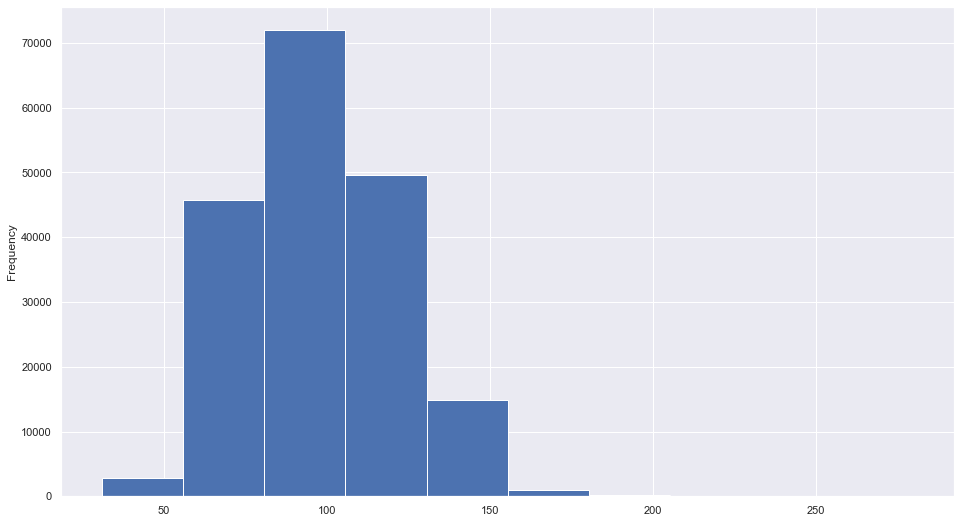

In [46]:
df['floor_area_sqm'].plot.hist()

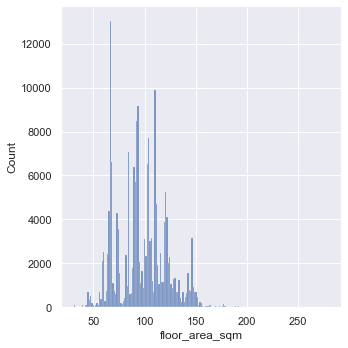

In [48]:
sns.displot(df['floor_area_sqm'])

> Part B):
> - Explore the relationship between the **storey_midpoint** and the **price_per_sqft** of the resale units

<AxesSubplot:xlabel='storey_midpoint', ylabel='price_per_sqft'>

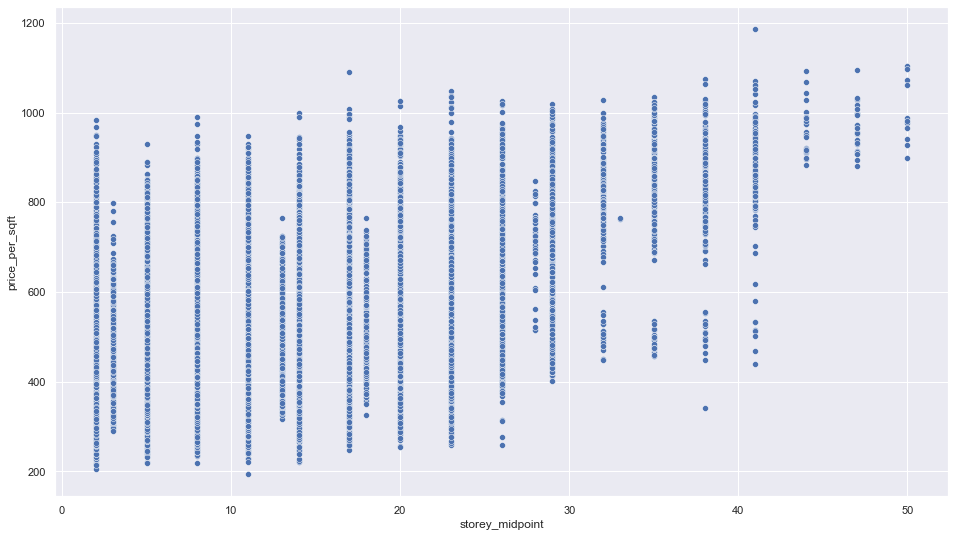

In [49]:
sns.scatterplot(x='storey_midpoint',y='price_per_sqft', data=df)

> Part C):
> - Create a new chart, by adding another field (i.e. dimension) to make further refinement to depict the relationship between the **storey_midpoint** and the **price_per_sqft**

<AxesSubplot:xlabel='storey_midpoint', ylabel='price_per_sqft'>

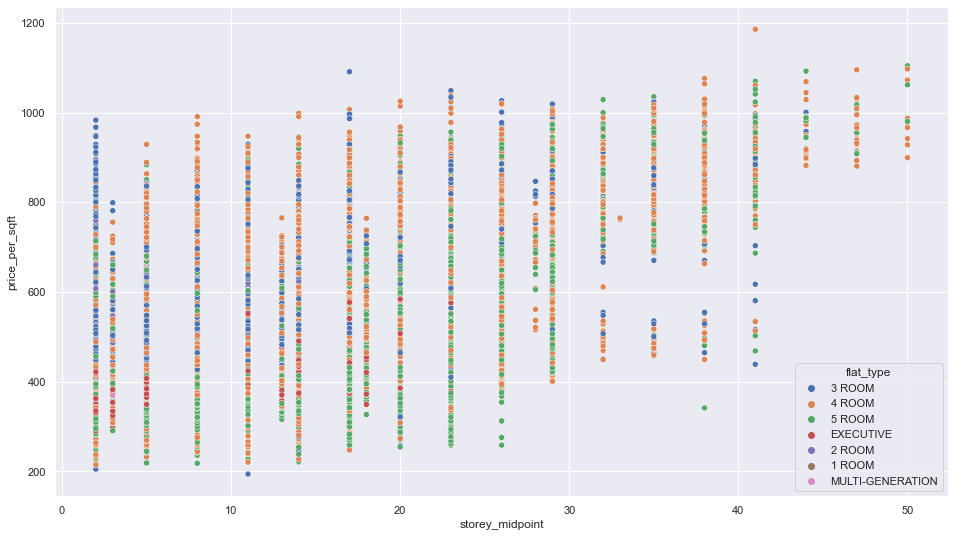

In [50]:
sns.scatterplot(x='storey_midpoint', y='price_per_sqft', hue='flat_type', data=df)

# Question 5

> - Plot a chart to depict the trend lines of price_per_sqft for the different towns

<AxesSubplot:xlabel='Tranc_Year'>

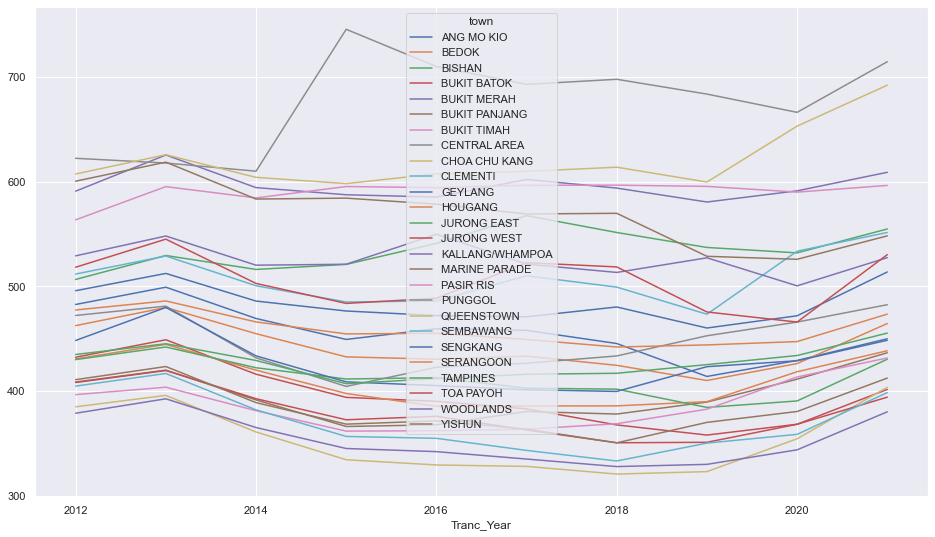

In [51]:
df_mean_price_by_year_and_town = df.pivot_table('price_per_sqft', index='Tranc_Year', columns='town', aggfunc='mean')
df_mean_price_by_year_and_town.plot.line()

# Question 6*

>Calculate the a column **percentage_difference_from_average**, which is the percentage difference of the unit's resale price over the average resale price of the same flat_type in the same town. </br>

>> For example, the average for "3 ROOM" flat type in ANG MO KIO is \\$324,380. </br>
For a particular HDB unit with resale price of $410,000, the percentage difference is .264, which means this particular unit is 26.4% more expensive than the average resale price of the same flat_type in the same town.

### finding mean price for each town and flat_type

In [54]:
groupby_town_flattype = df.groupby(['town', 'flat_type'])
groupby_town_flattype = groupby_town_flattype['resale_price'].mean()
groupby_town_flattype = groupby_town_flattype.reset_index()
groupby_town_flattype.columns = ['town', 'flat_type', 'avg_price_by_town_flat_type']
groupby_town_flattype



,town,flat_type,avg_price_by_town_flat_type
0,ANG MO KIO,2 ROOM,242418.615385
1,ANG MO KIO,3 ROOM,324380.775252
2,ANG MO KIO,4 ROOM,477254.230904
3,ANG MO KIO,5 ROOM,673624.661947
4,ANG MO KIO,EXECUTIVE,808776.633663
...,...,...,...
123,YISHUN,3 ROOM,297048.345005
124,YISHUN,4 ROOM,372609.786019
125,YISHUN,5 ROOM,480382.411392
126,YISHUN,EXECUTIVE,593859.443730


# Question 7 
1) Save the fullhdbdf in **data > 1_processed_data** folder as <b>hdb_resale_full_processed.csv</b> <br/>

In [55]:
export_folder_path = 'data/1_processed_data'
filename = 'hdb_resale_full_processed.csv'
df.to_csv(export_folder_path + '/' + filename, index=False)